## Skoltech
## Intro to data science, fall 2022
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://forms.gle/4q7o3aBVduyPgWzv9

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza: https://piazza.com/class/l8q9rqodz872zj

## Dataset

This dataset concerns credit card applications. It has a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. General goal is to predict which people in the dataset are successful in applying for a credit card.

#### Attributes

-   Gender: 0=Female, 1=Male
-   Age: Age in years
-   Debt: Outstanding debt
-   Married: 0=Single/Divorced/etc, 1=Married
-   BankCustomer: 0=does not have a bank account, 1=has a bank account
-   Investment score: a number from 0 to 10
-   BankRecord
-   Industry: job sector of current or most recent job
-   Ethnicity
-   YearsEmployed
-   PriorDefault: 0=no prior defaults, 1=prior default
-   Employed: 0=not employed, 1=employed
-   CreditScore
-   DriversLicense: 0=no license, 1=has license
-   Citizenship: either ByBirth, ByOtherMeans or Temporary
-   ZipCode: 5 digit number
-   Income
-   Approved: 0=not approved, 1=approved

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Read the data

In [232]:
df = pd.read_csv('credit_score_dataset.csv')

## 1. Data exploration

Let's take a closer look at the data.

In [3]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


### Q1.1

#### How many columns in the dataset?

In [218]:
print(df.shape[1])

18


### Q1.2

#### How many unique ethnicities are there?

In [6]:
print(df["Ethnicity"].nunique())

5


### Q1.3
#### What is the average age? Please answer with an integer. Please, use int().

In [7]:
print(int(df["Age"].mean()))

31


### Q1.4
#### People working in which industry are getting the most income on average?

In [220]:
print(df.groupby(["Industry"]).mean().sort_values(by=['Income'], ascending=False).head(1))
print("Transport")

           Gender    Age      Debt   Married  BankCustomer  InvestmentScore  \
Industry                                                                      
Transport     1.0  29.78  5.596667  0.666667      0.666667         6.733333   

           BankRecord  YearsEmployed  PriorDefault  Employed  CreditScore  \
Industry                                                                    
Transport    0.666667       4.208333      0.666667  0.333333          3.0   

           DriversLicense    ZipCode        Income  Approved  
Industry                                                      
Transport             1.0  98.666667  10473.666667  0.666667  
Transport


### Q1.5

#### Assuming that column 'YearsEmployed' counts years from the first employment until the current moment, in what age people start working? Build a histogram for the age of the first employment. What is the average age to start working at? Please, answer with a float.

In [21]:

df2 = df["Age"] - df["YearsEmployed"]
print("avg: %.3f" % df2.mean())

0      29.58
1      55.63
2      23.00
3      24.08
4      18.46
       ...  
685    19.83
686    20.67
687    23.25
688    17.88
689    26.71
Length: 690, dtype: float64
avg: 29.291


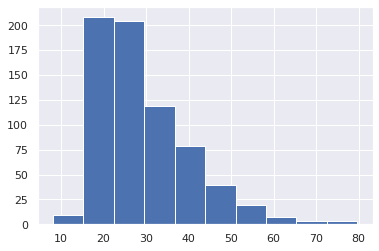

In [22]:
df2.hist()

### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for columns from ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income'] with 'Approved' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how loan application approval relates to other features. Note, you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) People over 40 years old have less debt than people under 40 years old
- (b) A credit application with low credit score is approved almost always
- (c) There is no clear dependence between debt and years employed
- (d) High income means high credit score

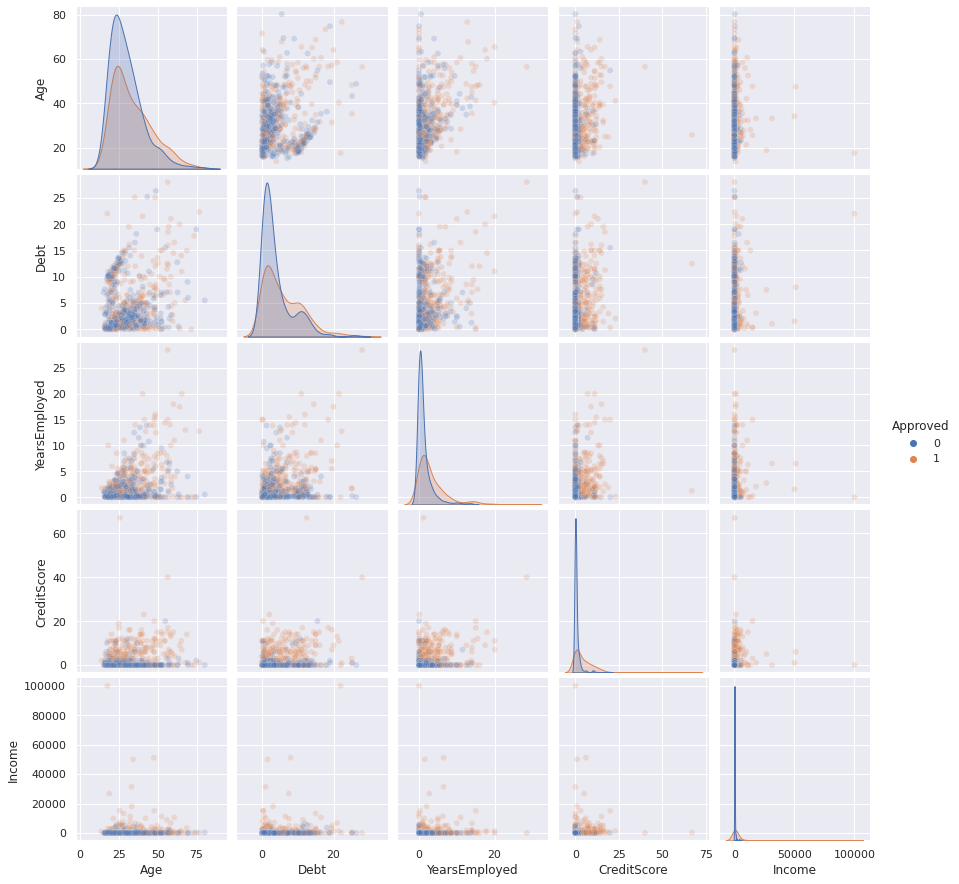

In [228]:
sns.pairplot(df[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income', 'Approved']], hue = 'Approved', kind='scatter', plot_kws=dict(alpha=0.2))

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for ethnicity and industry. How many Latino people are working in healthcare?

In [29]:
df2 = pd.crosstab(df["Ethnicity"], df["Industry"], dropna=False)

Industry,CommunicationServices,ConsumerDiscretionary,ConsumerStaples,Education,Energy,Financials,Healthcare,Industrials,InformationTechnology,Materials,Real Estate,Research,Transport,Utilities
Ethnicity,,,,,,,,,,,,,,
Asian,3,32,2,2,14,1,0,1,1,0,2,0,0,1
Black,2,10,2,4,27,12,0,7,17,29,6,0,1,21
Latino,0,0,0,0,0,2,52,0,1,0,0,2,0,0
Other,0,1,0,14,2,0,1,0,0,1,0,7,2,0
White,33,16,50,5,103,36,0,56,22,48,22,1,0,16


## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that are exactly the same for all of the people. Let's drop one of them. As an answer, write the names of these columns divided by a comma.

In [233]:
print(np.count_nonzero(df["BankCustomer"] == df["BankRecord"]) == df.shape[0])
df = df.drop(["BankRecord"], axis=1)
print(df.head(1))

True
   Gender    Age  Debt  Married  BankCustomer     Industry  InvestmentScore  \
0       1  30.83   0.0        1             1  Industrials             3.65   

  Ethnicity  YearsEmployed  PriorDefault  Employed  CreditScore  \
0     White           1.25             1         1            1   

   DriversLicense  Citizen  ZipCode  Income  Approved  
0               0  ByBirth      202       0         1  


### Q2.2

Now it's time to talk about the task for today. Our bank wants to predict whether the application for a loan is worthy or not. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'Approved' column) and data (the rest of the columns). How many positive labels are there in target?


In [234]:
y = np.array(df["Approved"])
X = df.drop(["Approved"], axis=1)

In [235]:
np.count_nonzero(y)

307

### Q2.3

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 314 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314, shuffle=True, stratify=y)

In [238]:
np.count_nonzero(y_test)

92

## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, k neighbors classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form as categorical, so let's make a copy of x with the following columns for the section:

'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model1 = LogisticRegression(max_iter = 5000)
X_tn = X_train.copy()
X_tt = X_test.copy()
X_tn = X_tn[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']]
X_tt = X_tt[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']]

model1.fit(X_tn, y_train)
y_pred = model1.predict(X_tt)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.862


### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [93]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()

model2.fit(X_tn, y_train)
y_pred = model2.predict(X_tt)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.613


### Q3.3

Build a random forest classifier with n_estimators = 5. What is the f1_score for the model?

In [92]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators = 5)

model3.fit(X_tn, y_train)
y_pred = model3.predict(X_tt)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.847


### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. You can use verbose argument of GridSearchCV in order to watch the progress of cross-validation. What is the f1 score for the model trained on the full train dataset with this regularization?

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {"penalty":['l2'], 'C':np.linspace(1, 1000, 100)}
LogReg = GridSearchCV(model1, parameters, scoring=make_scorer(f1_score), cv = 5)
LogReg.fit(X_tn, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([   1.        ,   11.09090909,   21.18181818,   31.27272727,
         41.36363636,   51.45454545,   61.54545455,   71.63636364,
         81.72727273,   91.81818182,  101.90909091,  112.        ,
        122.09090909,  132.18181818,  142.27272727,  152.36363636,
        162.45454545,  172.54545455,  182.63636364,  192.72727273,
        202.81818182,  212.90909091,  223.        ,  2...
        727.54545455,  737.63636364,  747.72727273,  757.81818182,
        767.90909091,  778.        ,  788.09090909,  798.18181818,
        808.27272727,  818.36363636,  828.45454545,  838.54545455,
        848.63636364,  858.72727273,  868.81818182,  878.90909091,
        889.        ,  899.09090909,  909.18181818,  919.27272727,
        929.36363636,  939.45454545,  949.54545455,  959.63636364,
        969.72727273,  979.81818182,  989.90909091, 1000.        ]),
                         'penalty': ['l2']

In [76]:
print("Best parameters from gridsearch: {}".format(LogReg.best_params_))
print("CV F1 score score=%0.3f" % LogReg.best_score_)

Best parameters from gridsearch: {'C': 394.54545454545456, 'penalty': 'l2'}
CV F1 score score=0.834


In [91]:
FinalLogReg = LogisticRegression(max_iter = 5000, penalty = "l2", C = 395)

FinalLogReg.fit(X_tn, y_train)
y_pred = FinalLogReg.predict(X_tt)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.863


### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [84]:
parameters_knn = {"n_neighbors": np.arange(5, 25, 2), "weights": ["uniform", "distance"], "p" : np.arange(1, 4)}

knn = GridSearchCV(model2, parameters_knn, scoring=make_scorer(f1_score), cv = 5)
knn.fit(X_tn, y_train)

print("Best parameters from gridsearch: {}".format(knn.best_params_))
print("CV F1 score score=%0.3f" % knn.best_score_)

Best parameters from gridsearch: {'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}
CV F1 score score=0.640


In [90]:
FinalKNN = KNeighborsClassifier(n_neighbors = 19, p = 1, weights = 'uniform')

FinalKNN.fit(X_tn, y_train)
y_pred = FinalKNN.predict(X_tt)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.655


### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [86]:
parameters_rfc = {"n_estimators": np.arange(25, 500, 25), "max_features": ["sqrt", "log2", np.linspace(5, 50, 9)]}

rfc = GridSearchCV(model3, parameters_rfc, scoring=make_scorer(f1_score), cv = 5)
rfc.fit(X_tn, y_train)

print("Best parameters from gridsearch: {}".format(rfc.best_params_))
print("CV F1 score score=%0.3f" % rfc.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
95 fits failed out of a total of 285.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

Best parameters from gridsearch: {'max_features': 'log2', 'n_estimators': 75}
CV F1 score score=0.839


In [89]:
FinalRFC = RandomForestClassifier(n_estimators = 75, max_features = 'log2')

FinalRFC.fit(X_tn, y_train)
y_pred = FinalRFC.predict(X_tt)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.862


## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income'. 

What is the maximum value of Income now in the test set?

In [239]:
from sklearn.preprocessing import MinMaxScaler

num_features = ['Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income']

In [240]:
scaler = MinMaxScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [241]:
print("%.3f" % X_test["Income"].max())

0.066


### Q4.2
We have three categorical columns - 'Industry', 'Ethnicity' and 'Citizen'. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Industry', 'Ethnicity' and 'Citizen' columns.

How many columns do we have now?

In [242]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

encoded_features_train = pd.DataFrame(ohe.fit_transform(X_train[['Industry', 'Ethnicity', 'Citizen']]))
encoded_features_test = pd.DataFrame(ohe.fit_transform(X_test[['Industry', 'Ethnicity', 'Citizen']]))

X_train.drop(['Industry', 'Ethnicity', 'Citizen'], axis=1, inplace=True)
X_test.drop(['Industry', 'Ethnicity', 'Citizen'], axis=1, inplace=True)

X_train = pd.concat([X_train.reset_index(), encoded_features_train.reset_index()], axis=1)
X_test = pd.concat([X_test.reset_index(), encoded_features_test.reset_index()], axis=1)

X_train = X_train.drop(['index'], axis=1)
X_test = X_test.drop(['index'], axis=1)
print(X_train.shape[1])

35


### Q4.3

To check the effects of the modification, train the logistic regression with **updated** optimal C. What is the f1 score now?

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {"penalty":['l2'], 'C':np.linspace(1, 1000, 33)}
LogReg = GridSearchCV(LogisticRegression(max_iter = 5000), parameters, scoring=make_scorer(f1_score), cv = 5)
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([   1.     ,   32.21875,   63.4375 ,   94.65625,  125.875  ,
        157.09375,  188.3125 ,  219.53125,  250.75   ,  281.96875,
        313.1875 ,  344.40625,  375.625  ,  406.84375,  438.0625 ,
        469.28125,  500.5    ,  531.71875,  562.9375 ,  594.15625,
        625.375  ,  656.59375,  687.8125 ,  719.03125,  750.25   ,
        781.46875,  812.6875 ,  843.90625,  875.125  ,  906.34375,
        937.5625 ,  968.78125, 1000.     ]),
                         'penalty': ['l2']},
             scoring=make_scorer(f1_score))

In [160]:
print("Best parameters from gridsearch: {}".format(LogReg.best_params_))
print("CV F1 score score=%0.3f" % LogReg.best_score_)

Best parameters from gridsearch: {'C': 1.0, 'penalty': 'l2'}
CV F1 score score=0.837


In [244]:
FinalLogReg = LogisticRegression(max_iter = 5000, penalty = "l2", C = 1)

FinalLogReg.fit(X_train, y_train)
y_pred = FinalLogReg.predict(X_test)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.884


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


### Q4.4

Another popular performance metric is the ROC curve. Train a k-NN and logistic regression with **updated** optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

In [245]:
#LogReg
import matplotlib.pyplot as plt
from sklearn import metrics

logreg_scores = FinalLogReg.predict_proba(X_test)[::,1]

fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, logreg_scores, pos_label=1)

roc_auc1 = metrics.roc_auc_score(y_test, logreg_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [164]:
parameters_knn = {"n_neighbors": np.arange(5, 25, 2), "weights": ["uniform", "distance"], "p" : np.arange(1, 4)}

knn = GridSearchCV(KNeighborsClassifier(), parameters_knn, scoring=make_scorer(f1_score), cv = 5)
knn.fit(X_train, y_train)

print("Best parameters from gridsearch: {}".format(knn.best_params_))
print("CV F1 score score=%0.3f" % knn.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Best parameters from gridsearch: {'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
CV F1 score score=0.647


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [246]:
FinalKNN = KNeighborsClassifier(n_neighbors = 19, p = 1, weights = 'distance')

FinalKNN.fit(X_train, y_train)
y_pred = FinalKNN.predict(X_test)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.852


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [247]:
knn_scores = FinalKNN.predict_proba(X_test)[::,1]

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, knn_scores, pos_label=1)

roc_auc2 = metrics.roc_auc_score(y_test, knn_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


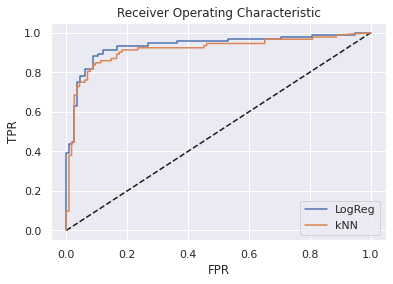

In [254]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LogReg")
plt.plot(fpr2, tpr2, label= "kNN")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

As we can see the difference between ROC curves upper FPR 0.7 is approximately near 0, so:

In [253]:
diff = roc_auc1 - roc_auc2
print("%.3f" % diff)

0.020


### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

In [185]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [193]:
df_my = df.copy()

Let's try to make a simple classification by 'InvestmentScore' .5 quantile:

In [194]:
df_my["Investor"] = np.where(df['InvestmentScore'] <= df['InvestmentScore'].quantile(.5), 0, 1)

Also let's recalculate 'PriorDefault' using 'Debt' and 'Income':

In [195]:
df_my["Prior"] = np.where((df['Debt'] <= df['Debt'].quantile(.5)) & (df['Income'] >= df['Income'].quantile(.8)), 10,
                 np.where((df['Debt'] <= df['Debt'].quantile(.5)) & (df['Income'] >= df['Income'].quantile(.6)) & (df['Income'] < df['Income'].quantile(.8)), 9,
                 np.where((df['Debt'] <= df['Debt'].quantile(.5)) & (df['Income'] >= df['Income'].quantile(.4)) & (df['Income'] < df['Income'].quantile(.6)), 8,
                 np.where((df['Debt'] <= df['Debt'].quantile(.5)) & (df['Income'] >= df['Income'].quantile(.2)) & (df['Income'] < df['Income'].quantile(.4)), 7,
                 np.where((df['Debt'] <= df['Debt'].quantile(.5)) &  (df['Income'] < df['Income'].quantile(.2)), 6,
                 np.where((df['Debt'] >= df['Debt'].quantile(.5)) & (df['Income'] >= df['Income'].quantile(.6)) & (df['Income'] < df['Income'].quantile(.8)), 5,
                 np.where((df['Debt'] >= df['Debt'].quantile(.5)) & (df['Income'] >= df['Income'].quantile(.4)) & (df['Income'] < df['Income'].quantile(.6)), 4,
                 np.where((df['Debt'] >= df['Debt'].quantile(.5)) & (df['Income'] >= df['Income'].quantile(.2)) & (df['Income'] < df['Income'].quantile(.4)), 3,
                 np.where((df['Debt'] >= df['Debt'].quantile(.5)) & (df['Income'] < df['Income'].quantile(.2)), 2, 1)))))))))

We would work only with 'Gender', 'Age', 'Married', 'Industry', 'CreditScore' and 2 new columns

In [197]:
df_my = df_my[['Gender', 'Age', 'Married', 'Industry', 'CreditScore', 'Prior', 'Investor', 'Approved']]

In [198]:
y = np.array(df_my["Approved"])
X = df_my.drop(["Approved"], axis=1)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314, shuffle=True, stratify=y)

In [202]:
ohe = OneHotEncoder(sparse=False)

encoded_features_train = pd.DataFrame(ohe.fit_transform(X_train[['Industry']]))
encoded_features_test = pd.DataFrame(ohe.fit_transform(X_test[['Industry']]))

X_train.drop(['Industry'], axis=1, inplace=True)
X_test.drop(['Industry'], axis=1, inplace=True)

X_train = pd.concat([X_train.reset_index(), encoded_features_train.reset_index()], axis=1)
X_test = pd.concat([X_test.reset_index(), encoded_features_test.reset_index()], axis=1)

X_train = X_train.drop(['index'], axis=1)
X_test = X_test.drop(['index'], axis=1)

In [203]:
parameters = {'C':np.linspace(1, 100, 10)}
LogReg = GridSearchCV(LogisticRegression(max_iter = 5000, penalty = "l2"), parameters, scoring=make_scorer(f1_score), cv = 5)
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])},
             scoring=make_scorer(f1_score))

In [204]:
print("Best parameters from gridsearch: {}".format(LogReg.best_params_))
print("CV F1 score score=%0.3f" % LogReg.best_score_)

Best parameters from gridsearch: {'C': 12.0}
CV F1 score score=0.652


In [205]:
FinalLogReg = LogisticRegression(max_iter = 5000, penalty = "l2", C = 12)

FinalLogReg.fit(X_train, y_train)
y_pred = FinalLogReg.predict(X_test)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.781


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Prefomanse is lower than on previous model;(

### Q5.2

Train an xboost model with f1 score 0.8+

In [206]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [207]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

In [212]:
y = np.array(df["Approved"])
X = df.drop(["Approved"], axis=1)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314, shuffle=True, stratify=y)

In [214]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

encoded_features_train = pd.DataFrame(ohe.fit_transform(X_train[['Industry', 'Ethnicity', 'Citizen']]))
encoded_features_test = pd.DataFrame(ohe.fit_transform(X_test[['Industry', 'Ethnicity', 'Citizen']]))

X_train.drop(['Industry', 'Ethnicity', 'Citizen'], axis=1, inplace=True)
X_test.drop(['Industry', 'Ethnicity', 'Citizen'], axis=1, inplace=True)

X_train = pd.concat([X_train.reset_index(), encoded_features_train.reset_index()], axis=1)
X_test = pd.concat([X_test.reset_index(), encoded_features_test.reset_index()], axis=1)

X_train = X_train.drop(['index'], axis=1)
X_test = X_test.drop(['index'], axis=1)

In [215]:
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
print("F1: %.3f" % f1_score(y_test, y_pred))

F1: 0.859


works straight out of the box)